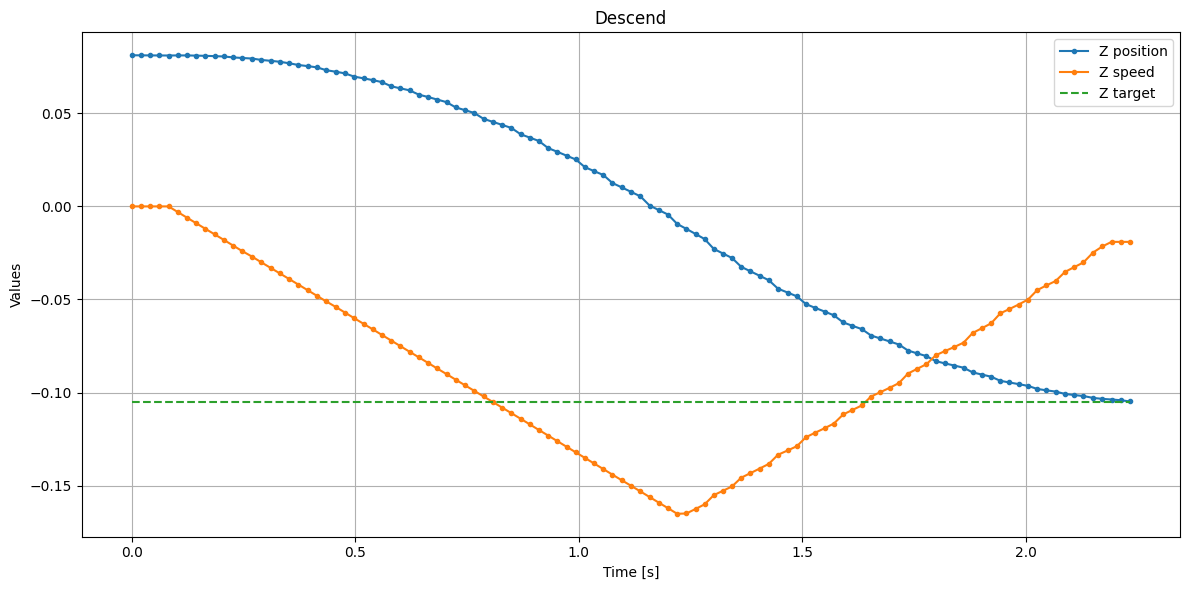

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("descend/positions_2025-08-09_22-00-55.csv")

# Optional: convert raw timestamp to relative time
df["relative_time"] = df["time"] - df["time"].iloc[0]

# Plotting
plt.figure(figsize=(12, 6))
plt.clf() 
plt.plot(df["relative_time"], df["z_pos"], label="Z position", marker="o", linestyle="-", markersize=3)
#plt.plot(df["relative_time"], df["rotation"], label="Rotation")
plt.plot(df["relative_time"], df["z_speed"], label="Z speed", marker="o", linestyle="-",markersize=3)
#plt.plot(df["relative_time"], df["rz_speed"], label="Rz speed")
#plt.plot(df["relative_time"], df["delta_rz_speed"], label="Delta rz speed")
plt.plot(df["relative_time"], df["z_target"], label="Z target", linestyle="--")
#plt.plot(df["relative_time"], df["rz_target"], label="Rz target", linestyle="--")

plt.xlabel("Time [s]")
plt.ylabel("Values")
plt.title("Descend")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<>:39: SyntaxWarning: invalid escape sequence '\q'
<>:39: SyntaxWarning: invalid escape sequence '\q'
C:\Users\oem\AppData\Local\Temp\ipykernel_5416\1790699355.py:39: SyntaxWarning: invalid escape sequence '\q'
  title = f"{base_titles[i]}   Target $r_z$: {target_deg}°,   Actual $r_z$: {actual_deg}°, $\quad \Delta r_z$: {diff}°"


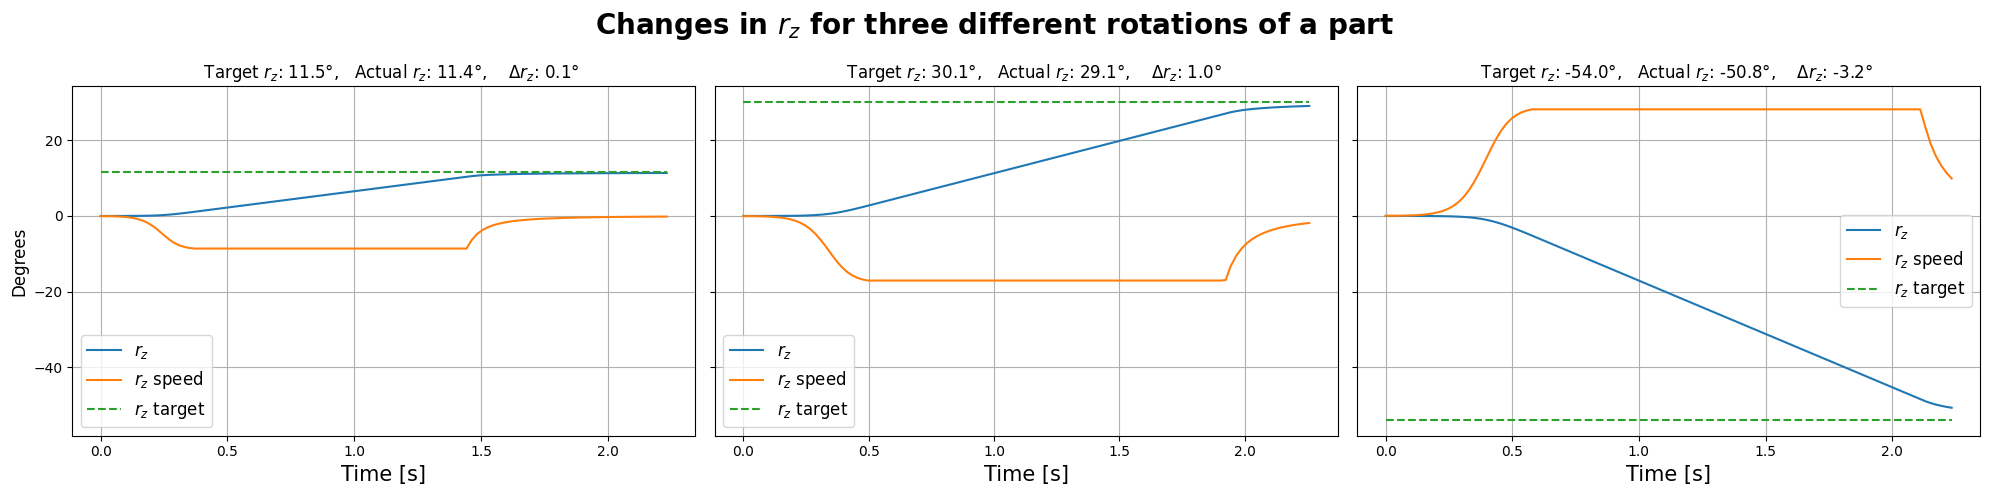

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
plot1 = pd.read_csv("descend/positions_2025-08-09_20-32-49.csv")
plot2 = pd.read_csv("descend/positions_2025-08-09_20-31-19.csv")
plot3 = pd.read_csv("descend/positions_2025-08-09_20-36-01.csv")

# Convert time to relative time for each DataFrame and radians to degrees
for df in [plot1, plot2, plot3]:
    df["relative_time"] = df["time"] - df["time"].iloc[0]
    df["rotation_deg"] = df["rotation"] * 180 / 3.14159
    df["rz_speed_deg"] = df["rz_speed"] * 180 / 3.14159
    df["rz_target_deg"] = df["rz_target"] * 180 / 3.14159

# Extract rz_target (now in degrees)
def extract_target(df):
    return round(df["rz_target_deg"].iloc[0], 1)

targets_deg = [extract_target(df) for df in [plot1, plot2, plot3]]

# Calculate the final actual rotation in degrees and difference
def extract_final_rotation_and_diff(df, target_deg):
    actual_deg = round(df["rotation_deg"].iloc[-1], 1)
    difference = round(target_deg - actual_deg, 1)
    return actual_deg, difference

final_rotations_diffs = [extract_final_rotation_and_diff(df, tgt) for df, tgt in zip([plot1, plot2, plot3], targets_deg)]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

base_titles = ["", "", ""]
plots = [plot1, plot2, plot3]

for i, data in enumerate(plots):
    target_deg = targets_deg[i]
    actual_deg, diff = final_rotations_diffs[i]
    title = f"{base_titles[i]}   Target $r_z$: {target_deg}°,   Actual $r_z$: {actual_deg}°, $\quad \Delta r_z$: {diff}°"
    
    axs[i].plot(data["relative_time"], data["rotation_deg"], label="$r_z$", color='tab:blue')
    axs[i].plot(data["relative_time"], data["rz_speed_deg"], label="$r_z$ speed", color='tab:orange')
    axs[i].plot(data["relative_time"], data["rz_target_deg"], label="$r_z$ target", color='tab:green', linestyle="--")
    axs[i].set_title(title)
    axs[i].set_xlabel("Time [s]", fontsize=15)
    axs[i].grid(True)
    axs[i].legend(fontsize=12)

axs[0].set_ylabel("Degrees", fontsize=12)
fig.suptitle("Changes in $r_z$ for three different rotations of a part", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()
